## NumPy Refresher

**Goal:**  
Understand how NumPy represents data as arrays, including:
- Array shape (dimensions)
- Data type
- How values are stored in memory

These concepts are foundational for:
- Pandas DataFrames
- Images as arrays
- Machine learning feature matrices


In [93]:
import numpy as np

In [94]:
# 1-dimensional arrays
a = np.array([1,2,3,4,5])

print("Just the array:", a)
print("=" * 30)

# Shape tells us the dimensions or how many elements along each axis
print("Shape of Array 'a' = ", a.shape)
print("=" * 30)

# dtype tells us what type the data is (data matching is important in some instances)
print("dtype of Array 'a' = ", a.dtype)
print("=" * 30)


Just the array: [1 2 3 4 5]
Shape of Array 'a' =  (5,)
dtype of Array 'a' =  int64


In [95]:
# 2D array (matrix)
b = np.array([
    [1,2,3,4], 
    [5,6,7,8]
])

print("Just 'b' array:\n", b)
print("=" * 30)
print("Shape: ", b.shape)
print("=" * 30)
print("dtype: ", b.dtype)
print("=" * 30)


Just 'b' array:
 [[1 2 3 4]
 [5 6 7 8]]
Shape:  (2, 4)
dtype:  int64


In [96]:
# Creating a 3x3 array filled with ones
# Useful for initialising with placeholders
c = np.ones((3, 3))
print("Array of ones:\n", c)
print("=" * 30)

d = np.arange(1,5)
print("Range Array:", d)
print("=" * 30)

Array of ones:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Range Array: [1 2 3 4]


## Student Tasks
- Using the above create a 3x4 array using values 0-11
- Print the array and shape

In [97]:
# Can use .arange to set the range and .reshape to correct it to a new shape
myArray = np.arange(0,12).reshape(3,4)

print("3x4 Array:\n", myArray)
print("=" * 30)
print("Shape: ", myArray.shape)
print("=" * 30)

3x4 Array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Shape:  (3, 4)


## Working with Pandas

Pandas is the standard Python library for working with tabular data.

In machine learning:
- Rows typically represent **samples**
- Columns represent **features**

Pandas is commonly used to load, explore, and clean data before passing it to
NumPy and scikit-learn.


In [98]:
import pandas as pd              # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting and visualisation

# Ensure all columns are visible when printing DataFrames
pd.set_option('display.max_columns', None)

# Prevent line wrapping for wide DataFrames
pd.set_option('display.width', None)


## Pandas Introduction (ML-Focused)

Pandas is used to work with **structured, tabular data**.

In machine learning workflows, pandas usually sits between:
- Raw data (CSV, Excel, database)
- NumPy arrays and scikit-learn models

### Why not just NumPy?

NumPy arrays:
- Are fast and memory-efficient
- Require all elements to be the **same data type**
- Do not store column names

Pandas DataFrames:
- Can store **mixed data types** (numbers, strings, booleans)
- Use **column labels** and **row indices**
- Are easier to inspect, filter, and clean

This makes pandas ideal for **data exploration and preparation**, not modelling itself.


### Mental Model

Think of a pandas DataFrame as:
- A spreadsheet
- Backed by NumPy arrays
- With labels and metadata

Eventually, most ML models require:
- `X` → NumPy array of features
- `y` → NumPy array of targets

Pandas helps us get there cleanly and safely.


### Core Data Structures

**Series**
- One-dimensional labelled array
- Similar to a single column in a spreadsheet

**DataFrame**
- Two-dimensional table of data
- Rows = samples
- Columns = features


In [99]:
# Create a simple dataset using a Python dictionary
# Keys become column names
# Values become column data
data = {
    "name":  ["Alice", "Bob", "Charlie", "Diana"],
    "age":   [21, 23, 22, 24],
    "grade": [68, 75, 82, 90]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,name,age,grade
0,Alice,21,68
1,Bob,23,75
2,Charlie,22,82
3,Diana,24,90


In [100]:
# Display a summary of the DataFrame
# Includes column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   age     4 non-null      int64 
 2   grade   4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [101]:
# Select a single column from the DataFrame
# This returns a pandas Series
name_series = df["name"]

print(name_series)
print("Type:", type(name_series))


0      Alice
1        Bob
2    Charlie
3      Diana
Name: name, dtype: object
Type: <class 'pandas.core.series.Series'>


In [102]:
# Convert the Series to a NumPy array
name_array = name_series.values

print("As NumPy array:")
print(name_array)
print("Type:", type(name_array))


As NumPy array:
['Alice' 'Bob' 'Charlie' 'Diana']
Type: <class 'numpy.ndarray'>


Most machine learning libraries expect NumPy arrays, not pandas objects.  
Pandas is typically used for preparation; NumPy is used for modelling.

### Summary so far

- Pandas DataFrames store labelled, tabular data
- Selecting a column returns a Series
- Series can be converted to NumPy arrays
- ML models typically operate on NumPy arrays

### Student Task

- Select the `age` column  
- Select `name` and `grade` together  
- Filter rows where `grade >= 75`

In [103]:
# Task 01 - Just us dataframeName['columnNeeded']
age_column = df['age']

# Task 02 - Pandas expects one single list so dataframe[['columnOne', 'columnTwo' ...etc]] - NOT [['name'], ['grade']] for eg
multi_select = df[['name', 'grade']]

# Task 03 - Use .loc to apply a filter and select a label where .loc[rows, columns]
# So in english this reads: Select all 'df' rows where 'grade' >= 75, display columns name and grade
filtered_grades = df.loc[df['grade'] >= 75, ['name', 'grade']]

print("Age Column Selected:\n", age_column)
print("=" * 30)
print("Two Columns Selected:\n", multi_select)
print("=" * 30)
print("Grade Column Filtered:\n", filtered_grades)

Age Column Selected:
 0    21
1    23
2    22
3    24
Name: age, dtype: int64
Two Columns Selected:
       name  grade
0    Alice     68
1      Bob     75
2  Charlie     82
3    Diana     90
Grade Column Filtered:
       name  grade
1      Bob     75
2  Charlie     82
3    Diana     90


## Visualisation (Why are we plotting?)

Visualisation is used in machine learning to:
- Understand the distribution of data
- Identify trends and outliers
- Decide whether a model (e.g. linear regression) is appropriate

In this section, we use `matplotlib`, Python’s most common plotting library.
It is often used alongside pandas for quick data inspection.


`matplotlib.pyplot` is usually imported as `plt` and provides functions for creating
plots such as line charts, bar charts, and scatter plots.

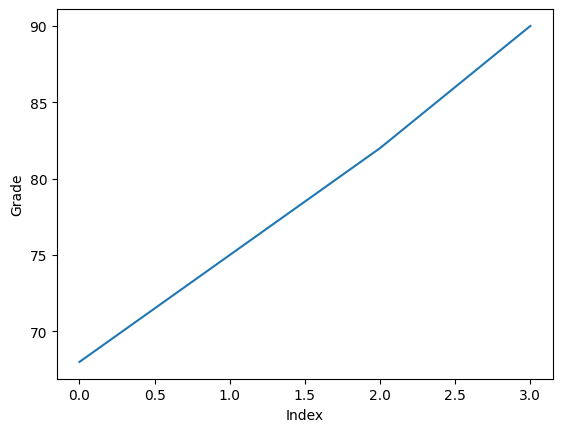

In [104]:
# Create a simple line plot of grades
# By default, matplotlib uses the DataFrame index for the x-axis
plt.plot(df["grade"])

# Label the axes
plt.xlabel("Index")
plt.ylabel("Grade")

# Display the plot
plt.show()

This plot shows how grades vary across the dataset.
The x-axis is the DataFrame index (row number).

### Note

A line plot is not always the best choice for categorical data.
For named categories (e.g. students), a bar chart is often clearer.


### Student Task

Create a **bar chart** showing student names on the x-axis and their grades on the y-axis.

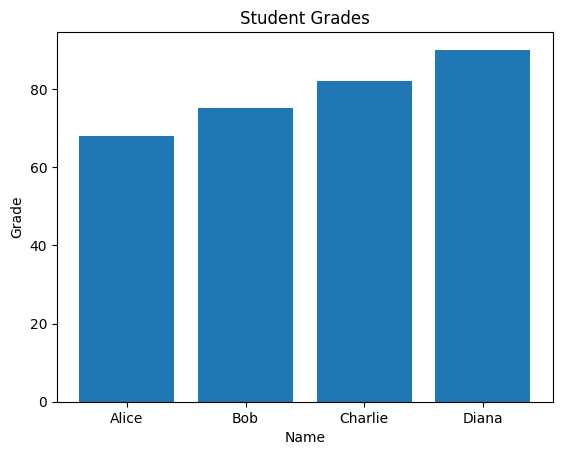

In [105]:
# Use .bar to create a bar chart, select data frame columns, x,y
plt.bar(df['name'], df['grade'])

# Labels and title
plt.xlabel('Name')
plt.ylabel('Grade')
plt.title('Student Grades')

plt.show()

## Creating Sample Data

### Creating Sample Data (Why are we doing this?)

In real machine learning projects, data usually comes from files such as:
- CSV files (common for tabular data)
- JSON files (common for APIs and semi-structured data)

In this section, we create small sample datasets to:
- Practice saving data to disk
- Simulate loading real-world datasets
- Use pandas as a data ingestion tool

In [106]:
# Create a sample dataset representing student performance
student_data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 
             'Frank', 'Grace', 'Henry', 'Iris', 'Jack'],
    'age': [20, 22, 21, 23, 20, 22, 21, 24, 20, 23],
    'math_score': [85, 72, 90, 88, 76, 95, 82, 79, 91, 84],
    'science_score': [78, 85, 88, 92, 81, 89, 87, 75, 94, 80],
    'attendance': [95, 87, 92, 98, 85, 97, 90, 82, 96, 88]
}

# Convert dictionary to DataFrame
df_students = pd.DataFrame(student_data)

# Save DataFrame to CSV (index=False avoids adding row numbers to the file)
df_students.to_csv('students.csv', index=False)

print("Created students.csv")
df_students.head()

Created students.csv


,student_id,name,age,math_score,science_score,attendance
0,1,Alice,20,85,78,95
1,2,Bob,22,72,85,87
2,3,Charlie,21,90,88,92
3,4,Diana,23,88,92,98
4,5,Eve,20,76,81,85


In [107]:
# Create a sample dataset representing weather measurements
weather_data = {
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'temperature': [12.5, 11.8, 13.2, 13.8, 10.9],
    'humidity': [82, 85, 78, 80, 88],
    'wind_speed': [15.2, 18.5, 12.3, 14.1, 20.3],
    'rainfall_mm': [2.3, 3.1, 1.8, 2.0, 3.8]
}

df_weather = pd.DataFrame(weather_data)

# Save DataFrame to JSON format
# orient='records' stores data as a list of dictionaries
df_weather.to_json('weather.json', orient='records', indent=2)

print("Created weather.json")
df_weather

Created weather.json


,city,temperature,humidity,wind_speed,rainfall_mm
0,Limerick,12.5,82,15.2,2.3
1,Galway,11.8,85,18.5,3.1
2,Dublin,13.2,78,12.3,1.8
3,Cork,13.8,80,14.1,2.0
4,Belfast,10.9,88,20.3,3.8


### Key Takeaways

- Pandas can load and save data in multiple formats
- CSV is common for datasets and spreadsheets
- JSON is common for web APIs and semi-structured data
- In ML workflows, data is often loaded from files like these

### Loading and Exploring Data

Before using data in machine learning, we must:
- Load it correctly
- Understand its structure
- Check data types and basic statistics

Pandas provides methods to quickly inspect a dataset and answer these questions.

In [108]:
# Load the CSV file into a pandas DataFrame
students_df = pd.read_csv('students.csv')

In [109]:
print("First few rows:")
print(students_df.head())

First few rows:
   student_id     name  age  math_score  science_score  attendance
0           1    Alice   20          85             78          95
1           2      Bob   22          72             85          87
2           3  Charlie   21          90             88          92
3           4    Diana   23          88             92          98
4           5      Eve   20          76             81          85


`head()` shows the first few rows of the dataset.
This helps verify that the data loaded correctly and gives a quick overview.

In [110]:
print("\nDataFrame info:")
students_df.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     10 non-null     int64 
 1   name           10 non-null     object
 2   age            10 non-null     int64 
 3   math_score     10 non-null     int64 
 4   science_score  10 non-null     int64 
 5   attendance     10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 612.0+ bytes


`info()` displays:
- Column names
- Data types
- Number of non-null values

This is critical for identifying missing values and incorrect data types.

In [111]:
print("\nBasic statistics:")
print(students_df.describe())


Basic statistics:
       student_id        age  math_score  science_score  attendance
count    10.00000  10.000000   10.000000      10.000000   10.000000
mean      5.50000  21.600000   84.200000      84.900000   91.000000
std       3.02765   1.429841    7.146095       6.226288    5.477226
min       1.00000  20.000000   72.000000      75.000000   82.000000
25%       3.25000  20.250000   79.750000      80.250000   87.250000
50%       5.50000  21.500000   84.500000      86.000000   91.000000
75%       7.75000  22.750000   89.500000      88.750000   95.750000
max      10.00000  24.000000   95.000000      94.000000   98.000000


`describe()` provides summary statistics for numerical columns,
such as mean, standard deviation, min, and max.

In [112]:
# JSON files are often used by web APIs and store data in a more flexible format.  
# Pandas can load them directly into a DataFrame.

weather_df = pd.read_json('weather.json')

In [113]:
print("Weather DataFrame:")
print(weather_df)

Weather DataFrame:
       city  temperature  humidity  wind_speed  rainfall_mm
0  Limerick         12.5        82        15.2          2.3
1    Galway         11.8        85        18.5          3.1
2    Dublin         13.2        78        12.3          1.8
3      Cork         13.8        80        14.1          2.0
4   Belfast         10.9        88        20.3          3.8


In [114]:
print("\nColumn data types:")
print(weather_df.dtypes)


Column data types:
city            object
temperature    float64
humidity         int64
wind_speed     float64
rainfall_mm    float64
dtype: object


Checking data types is important because:
- Machine learning models require numerical inputs
- Non-numeric columns must be encoded or removed

### Key Takeaways

- `read_csv()` and `read_json()` load data into DataFrames
- `head()` provides a quick visual check
- `info()` reveals structure and data quality
- `describe()` summarises numerical data

## Data Wrangling (What does this mean?)

Data wrangling refers to preparing raw data for analysis or machine learning.
This often includes:
- Creating new features
- Filtering data
- Aggregating data
- Handling missing values
- Combining multiple datasets

These steps are usually performed **before** training a model.

### A. Creating and Transforming Features

In machine learning, we often create **new features** from existing ones.
This allows models to capture more useful information.

In [115]:
# Create a new feature: average score across subjects
students_df['average_score'] = (
    students_df['math_score'] + students_df['science_score']
) / 2

students_df[['name', 'math_score', 'science_score', 'average_score']]

,name,math_score,science_score,average_score
0,Alice,85,78,81.5
1,Bob,72,85,78.5
2,Charlie,90,88,89.0
3,Diana,88,92,90.0
4,Eve,76,81,78.5
5,Frank,95,89,92.0
6,Grace,82,87,84.5
7,Henry,79,75,77.0
8,Iris,91,94,92.5
9,Jack,84,80,82.0


This is an example of **feature engineering** — creating a new input variable.

In [116]:
# Filter students with average score above 85
high_performers = students_df.loc[students_df['average_score'] > 85]

high_performers[['name', 'average_score']]

,name,average_score
2,Charlie,89.0
3,Diana,90.0
5,Frank,92.0
8,Iris,92.5


Filtering rows is commonly used to:
- Remove outliers
- Focus on specific subsets

### Grouping and Aggregation

Grouping allows us to summarise data across categories.

In [117]:
age_groups = (
    students_df
    .groupby('age')
    .agg({
        'math_score': 'mean',
        'science_score': 'mean',
        'attendance': 'mean'
    })
    .round(2)
)

age_groups

,math_score,science_score,attendance
age,,,
20,84.0,84.33,92.0
21,86.0,87.50,91.0
22,83.5,87.00,92.0
23,86.0,86.00,93.0
24,79.0,75.00,82.0


Group-by operations are useful for exploratory analysis,
not usually direct model input.

### B. Handling Missing Data

Missing values are common in real datasets and must be handled
before training machine learning models.

In [118]:
students_with_missing = students_df.copy()

students_with_missing.loc[2, 'math_score'] = np.nan
students_with_missing.loc[5, 'science_score'] = np.nan
students_with_missing.loc[7, 'attendance'] = np.nan

students_with_missing

,student_id,name,age,math_score,science_score,attendance,average_score
0,1,Alice,20,85.0,78.0,95.0,81.5
1,2,Bob,22,72.0,85.0,87.0,78.5
2,3,Charlie,21,NaN,88.0,92.0,89.0
3,4,Diana,23,88.0,92.0,98.0,90.0
4,5,Eve,20,76.0,81.0,85.0,78.5
5,6,Frank,22,95.0,NaN,97.0,92.0
6,7,Grace,21,82.0,87.0,90.0,84.5
7,8,Henry,24,79.0,75.0,NaN,77.0
8,9,Iris,20,91.0,94.0,96.0,92.5
9,10,Jack,23,84.0,80.0,88.0,82.0


In [119]:
students_with_missing.isnull().sum()

student_id       0
name             0
age              0
math_score       1
science_score    1
attendance       1
average_score    0
dtype: int64

Always inspect missing data before deciding how to handle it.

In [120]:
# Strategy 1: Fill missing values with column means (need to specify numeric_only to avoid trying to access mean for strings)
students_filled = students_with_missing.fillna(
    students_with_missing.mean(numeric_only=True)
)

students_filled

,student_id,name,age,math_score,science_score,attendance,average_score
0,1,Alice,20,85.000000,78.000000,95.0,81.5
1,2,Bob,22,72.000000,85.000000,87.0,78.5
2,3,Charlie,21,83.555556,88.000000,92.0,89.0
3,4,Diana,23,88.000000,92.000000,98.0,90.0
4,5,Eve,20,76.000000,81.000000,85.0,78.5
5,6,Frank,22,95.000000,84.444444,97.0,92.0
6,7,Grace,21,82.000000,87.000000,90.0,84.5
7,8,Henry,24,79.000000,75.000000,92.0,77.0
8,9,Iris,20,91.000000,94.000000,96.0,92.5
9,10,Jack,23,84.000000,80.000000,88.0,82.0


In [121]:
# Strategy 2: Drop rows with missing values
students_dropped = students_with_missing.dropna()

len(students_dropped)

7

Different strategies may be appropriate depending on the dataset and task.

### C. Combining Datasets

In real projects, data often comes from multiple sources.
Pandas allows datasets to be combined using merge operations.

In [122]:
city_info = pd.DataFrame({
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'population': [94192, 79934, 554554, 208669, 343542],
    'province': ['Munster', 'Connacht', 'Leinster', 'Munster', 'Ulster']
})

In [123]:
weather_merged = pd.merge(weather_df, city_info, on='city')

weather_merged

,city,temperature,humidity,wind_speed,rainfall_mm,population,province
0,Limerick,12.5,82,15.2,2.3,94192,Munster
1,Galway,11.8,85,18.5,3.1,79934,Connacht
2,Dublin,13.2,78,12.3,1.8,554554,Leinster
3,Cork,13.8,80,14.1,2.0,208669,Munster
4,Belfast,10.9,88,20.3,3.8,343542,Ulster


Merging datasets allows additional context to be added to existing data.

### Quick Exercise

Complete the following tasks:

1. Calculate the temperature-to-humidity ratio for each city
2. Find the city with the highest rainfall
3. Create a new column categorising cities as 'Windy' (wind_speed > 15) or 'Calm'

In [125]:
# Calculate temp to humid ratio for each city
weather_merged['temp_humid_ratio'] = (weather_merged['humidity'] / weather_merged['temperature'])

# City with highest rainfall
# Get the index of the highest value    
idx = weather_merged['rainfall_mm'].idxmax()
highest_rainfall = weather_merged.loc[idx, 'city']
print("Highest rainfall city: ", highest_rainfall)

# Create Wind Category Column
# Create a default first
weather_merged['wind_category'] = 'calm'

weather_merged.loc[weather_merged['wind_speed'] >= 15, 'wind_category'] = 'windy'

# Print out result
weather_merged


Highest rainfall city:  Belfast


,city,temperature,humidity,wind_speed,rainfall_mm,population,province,temp_humid_ratio,wind_category
0,Limerick,12.5,82,15.2,2.3,94192,Munster,6.560000,windy
1,Galway,11.8,85,18.5,3.1,79934,Connacht,7.203390,windy
2,Dublin,13.2,78,12.3,1.8,554554,Leinster,5.909091,calm
3,Cork,13.8,80,14.1,2.0,208669,Munster,5.797101,calm
4,Belfast,10.9,88,20.3,3.8,343542,Ulster,8.073394,windy


## Exercises: Applying Pandas to New Datasets

In this exercise, you will apply the same data-loading and exploration techniques
learned earlier to new datasets.

No new concepts are introduced here — the goal is to practise and reinforce
the standard pandas workflow.

In [ ]:
# Load people.csv
people_df = pd.read_csv('people.csv')

# Inspect first few rows
print("People DataFrame - head():")
print(people_df.head())

# Inspect structure and data types
print("\nPeople DataFrame - info():")
people_df.info()

# Summary statistics (numerical columns only)
print("\nPeople DataFrame - describe():")
print(people_df.describe())

In [ ]:
# Load devices.json
devices_df = pd.read_json('devices.json')

# Inspect first few rows
print("Devices DataFrame:")
print(devices_df.head())

# Inspect structure and data types
print("\nDevices DataFrame - info():")
devices_df.info()

# Summary statistics (if numerical columns exist)
print("\nDevices DataFrame - describe():")
print(devices_df.describe())

### Reflection

- What type of data does each dataset represent?
- Which columns would require preprocessing before use in a machine learning model?
- Are there any obvious data quality issues?

---

## Lab 01 – Notebook 01 Cheat Sheet
### NumPy & Pandas Fundamentals

---

### NumPy Basics

**Arrays are the foundation of all numerical computing in Python.**

```python
import numpy as np

# Create arrays
np.array([1, 2, 3])           # From list
np.zeros((3, 4))              # 3x4 array of zeros
np.ones((2, 2))               # 2x2 array of ones
np.arange(0, 12)              # Range 0–11
np.arange(0, 12).reshape(3, 4)  # Reshape to 3x4
```

| Property | What it tells you |
|----------|-------------------|
| `arr.shape` | Dimensions (rows, cols) |
| `arr.dtype` | Data type (int64, float64, etc.) |
| `arr.size` | Total number of elements |

---

### Pandas Core Concepts

**DataFrames = labelled tables. Series = single columns.**

```python
import pandas as pd

# Load data
df = pd.read_csv('file.csv')
df = pd.read_json('file.json')

# Save data
df.to_csv('file.csv', index=False)
df.to_json('file.json', orient='records')
```

---

### Inspecting Data (Do This First!)

```python
df.head()       # First 5 rows
df.info()       # Column names, types, missing values
df.describe()   # Summary stats for numeric columns
df.dtypes       # Data type of each column
df.shape        # (rows, columns)
```

| Method | Purpose |
|--------|---------|
| `head()` | Quick visual check |
| `info()` | Structure & missing data |
| `describe()` | Stats: mean, std, min, max |

---

### Selecting Data

```python
# Single column → Series
df['column_name']

# Multiple columns → DataFrame
df[['col1', 'col2']]

# Filter rows
df[df['score'] > 80]

# Filter + select columns (preferred)
df.loc[df['score'] > 80, ['name', 'score']]
```

---

### Creating & Modifying Columns

```python
# New column from calculation
df['average'] = (df['math'] + df['science']) / 2

# Conditional column
df['status'] = 'default'
df.loc[df['score'] >= 85, 'status'] = 'high'
```

---

### Handling Missing Data

```python
# Check for missing values
df.isnull().sum()

# Fill with column mean
df.fillna(df.mean(numeric_only=True))

# Drop rows with missing values
df.dropna()
```

| Strategy | When to use |
|----------|-------------|
| Fill with mean | Numeric data, few missing values |
| Drop rows | Many columns affected, small % missing |

---

### Grouping & Aggregation

```python
# Group by column and calculate mean
df.groupby('category').mean()

# Multiple aggregations
df.groupby('category').agg({
    'score': 'mean',
    'attendance': 'max'
})
```

---

### Merging DataFrames

```python
# Combine two DataFrames on a common column
merged = pd.merge(df1, df2, on='key_column')
```

---

### Quick Plotting (Preview)

```python
import matplotlib.pyplot as plt

plt.bar(df['name'], df['score'])
plt.xlabel('Name')
plt.ylabel('Score')
plt.title('Student Scores')
plt.show()
```

---

### Mental Model

| Concept | Meaning |
|---------|---------|
| Rows | Samples / observations |
| Columns | Features / variables |
| DataFrame | Labelled table (for prep) |
| NumPy array | Raw numbers (for models) |

---

### Converting to NumPy (for ML)

```python
# Series → array
arr = df['column'].values

# DataFrame → array
X = df[['col1', 'col2']].values
```

> ML models expect NumPy arrays, not DataFrames.

---

### Key Takeaways

- NumPy arrays are fast, typed, and index-based
- Pandas adds labels, mixed types, and convenience
- Always inspect data before processing (`head`, `info`, `describe`)
- Clean missing data before modelling
- Convert to NumPy arrays before passing to ML models